In [56]:
import numpy as np
import matplotlib.pyplot as plt
# coords = np.array([[0,0], [1,0], [3,5], [10,20]])

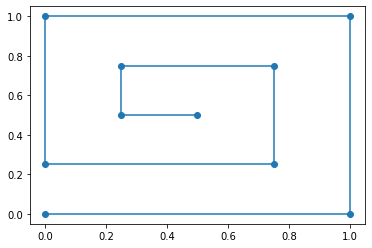

In [57]:
coords = np.array([[0.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 0.25],
       [0.75, 0.25],
       [0.75, 0.75],
       [0.25, 0.75],
       [0.25, 0.5 ],
       [0.5 , 0.5 ]])
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')
# np.zeros(coords.shape)

In [50]:
len(coords)

In [53]:
len([np.linalg.norm(coords[i]-coords[i-1]) for i in range(1, len(coords))])

In [120]:
# converts coordinate configuration into angles configuration
def coords2angle(coords): 
    thetas = []
    lengths = []
    for ind in range(len(coords)-1):
        edge = coords[ind+1] - coords[ind]
        length = np.linalg.norm(edge)
        lengths.append(length)
        theta = np.arccos(edge[0]/length)
        if edge[0] <= 0 and edge[1] < 0:
            theta += np.pi
        elif edge[0] > 0 and edge[1] < 0:
            theta = 2 * np.pi - theta
        thetas.append(theta)
    return np.array(thetas), np.array(lengths)

In [96]:
# converts angles configuration back to coordinate configuration
import cmath
def angle2coords(angles, lengths):
    coords = [[0,0]]
    for ind in range(len(angles)):
        # Get the displacement of the new coord as a complex number
        coord = lengths[ind] * np.exp(complex(0, angles[ind]))
        # Convert the complex number to a coord and offset it with the last coord
#         coord = [coords[ind][0] + np.real(coord), coords[ind][1] + np.imag(coord)]
        coord = [coords[ind][0] + lengths[ind] * np.cos(angles[ind]), 
                 coords[ind][1] + lengths[ind] * np.sin(angles[ind])]
        coords.append(coord)
    return np.array(coords)

In [23]:
# coords.size()

In [24]:
def gradient_term(wx, wy, vx, vy, ux, uy):
    g = np.array([[(-(-ux + wx)/sqrt((ux - wx)**2 + (uy - wy)**2) - (-vx + wx)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**2,
             (-(-uy + wy)/sqrt((ux - wx)**2 + (uy - wy)**2) - (-vy + wy)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**2],
             [((-ux + vx)/sqrt((ux - vx)**2 + (uy - vy)**2) - (vx - wx)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**2,
             ((-uy + vy)/sqrt((ux - vx)**2 + (uy - vy)**2) - (vy - wy)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**2],
             [((ux - vx)/sqrt((ux - vx)**2 + (uy - vy)**2) - (ux - wx)/sqrt((ux - wx)**2 + (uy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**2,
             ((uy - vy)/sqrt((ux - vx)**2 + (uy - vy)**2) - (uy - wy)/sqrt((ux - wx)**2 + (uy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**2]])
    return g

In [61]:
# computes `ENERGY` of a configuration and returns the gradient as well :)
def energy(coords):
    coords = np.array(coords)
    E = 0
    G = np.zeros(coords.shape)
    # Iterate through edges u,v
    for u_ind in range(len(coords)-1):
        u = coords[u_ind]
        v = coords[u_ind+1]
        edge = v - u
        # Iterate through vertices w not on the edge
        for w_ind in range(len(coords)):
            if w_ind==u_ind or w_ind==u_ind+1:
                continue
            w = coords[w_ind]
            # Add to the energy
            E+=1/(np.linalg.norm(u-w)+np.linalg.norm(v-w)-np.linalg.norm(u-v))**2
            # Add to the gradient
            g = gradient_term(w[0], w[1], v[0], v[1], u[0], u[1])
            G[w_ind, :] = G[w_ind, :] + g[0]
            G[u_ind + 1, :] = G[u_ind + 1, :] + g[1]
            G[u_ind, :] = G[u_ind, :] + g[2]
    return E,G 

999 358.25103445798305

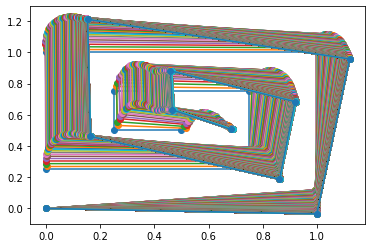

In [135]:
def gradient_descent(coords, stepsize = 0.01):
    e, gradient = energy(coords)
    new_coords = coords - stepsize * gradient
    return new_coords, gradient


coords = np.array([[0.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 0.25],
       [0.75, 0.25],
       [0.75, 0.75],
       [0.25, 0.75],
       [0.25, 0.5 ],
       [0.5 , 0.5 ]])

correct_lens = [np.linalg.norm(coords[i]-coords[i-1]) for i in range(1, len(coords))]

plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')

i = 0
while i<1000:
    tolerance = 0.01
#     print(i)
    coords, gradient = gradient_descent(coords, stepsize=0.0005)
    angs, lens = coords2angle(coords)
    coords = angle2coords(angs, correct_lens)
#     if i % 1 == 0:
    print(f"\r{i} {np.linalg.norm(gradient)}", end="")
    plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')
    i += 1
    if np.linalg.norm(gradient) < tolerance:
        break

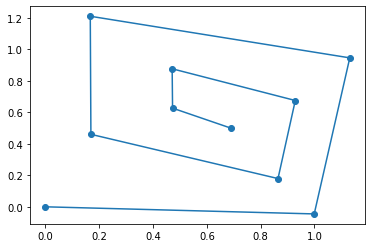

In [127]:
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')

In [8]:
energy(coords)

NameError: name 'coords' is not defined

In [ ]:
if 3:
    print("hi")

In [9]:
coords2angle(coords)

NameError: name 'coords' is not defined

[[ 5.80435664e-04 -6.87278278e-03]
 [ 1.00476183e+00 -3.60699767e-03]
 [ 1.00464401e+00  1.00475741e+00]
 [-3.62626970e-03  1.00536339e+00]
 [-4.23101139e-03  2.49568574e-01]
 [ 7.46603581e-01  2.49791362e-01]
 [ 7.47807293e-01  7.47837364e-01]
 [ 2.53807334e-01  7.50045138e-01]
 [ 2.52376271e-01  5.03173047e-01]
 [ 4.97276518e-01  4.99943487e-01]]
0 [ 1.00476183 -0.003607  ] [ 0.00058044 -0.00687278] [1.0041814  0.00326579] 1.0041867091297285 0.0032521749508884284
1 [1.00464401 1.00475741] [ 1.00476183 -0.003607  ] [-1.17820608e-04  1.00836441e+00] 1.008364419429698 1.5709131700771832
2 [-0.00362627  1.00536339] [1.00464401 1.00475741] [-1.00827028e+00  6.05979225e-04] 1.0082704655317098 3.140991644949335
3 [-0.00423101  0.24956857] [-0.00362627  1.00536339] [-6.04741688e-04 -7.55794820e-01] 0.7557950621976937 1.5715964666517699
4 [0.74660358 0.24979136] [-0.00423101  0.24956857] [7.50834593e-01 2.22788006e-04] 0.7508346257503925 0.00029672047892594566
5 [0.74780729 0.74783736] [0.746

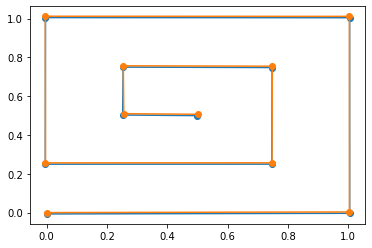

In [116]:
print(coords)
angles, lengths = coords2angle(coords)
print(angles)
new_coords = angle2coords(angles, lengths)
new_angles, _ = coords2angle(new_coords)
print(new_angles)
plt.plot([i[0] for i in coords[:]],[i[1] for i in coords[:]], '-o')
plt.plot([i[0] for i in new_coords[:]],[i[1] for i in new_coords[:]], '-o')
print(new_coords, np.linalg.norm(new_coords, 1))

In [12]:
from sympy import *
from sympy.vector import gradient
init_printing()

In [13]:
wx, wy, vx, vy, ux, uy = symbols('wx wy vx vy ux uy ', real = True)
w = Matrix([wx, wy])
v = Matrix([vx, vy])
u = Matrix([ux, uy])
expr = (w-v).norm(2) + (w-u).norm(2) - (v-u).norm(2)
exp = 1/expr
# gradient(exp)
l = [wx, wy, vx, vy, ux, uy ]
for var in l:
    print(diff(exp,var))

(-(-ux + wx)/sqrt((ux - wx)**2 + (uy - wy)**2) - (-vx + wx)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**2
(-(-uy + wy)/sqrt((ux - wx)**2 + (uy - wy)**2) - (-vy + wy)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**2
((-ux + vx)/sqrt((ux - vx)**2 + (uy - vy)**2) - (vx - wx)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**2
((-uy + vy)/sqrt((ux - vx)**2 + (uy - vy)**2) - (vy - wy)/sqrt((vx - wx)**2 + (vy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx - wx)**2 + (vy - wy)**2))**2
((ux - vx)/sqrt((ux - vx)**2 + (uy - vy)**2) - (ux - wx)/sqrt((ux - wx)**2 + (uy - wy)**2))/(-sqrt((ux - vx)**2 + (uy - vy)**2) + sqrt((ux - wx)**2 + (uy - wy)**2) + sqrt((vx -